In [1]:
import numpy as np
import pandas as pd

In [2]:
all_data = pd.read_csv("../../datasets/students_simple.csv")
N = 11
cols_ids = [N%5, 5 + ((N**2)%5)]
all_cols = list(all_data.columns)
cols = [all_cols[i] for i in cols_ids]
data = all_data[cols].to_numpy()
x = data[:, 0]
y = data[:, 1]

In [16]:
cols

['mass', 'bmi']

In [17]:
data

array([[45.   ,  3.533],
       [61.   ,  2.623],
       [56.   ,  2.875],
       [48.   ,  3.375],
       [54.   ,  3.   ],
       [58.   ,  2.828],
       [51.   ,  3.255],
       [62.   ,  2.726],
       [70.   ,  2.429],
       [72.   ,  2.361],
       [73.   ,  2.342],
       [64.   ,  2.672],
       [73.   ,  2.356],
       [68.   ,  2.559],
       [81.   ,  2.173],
       [84.   ,  2.095],
       [76.   ,  2.342],
       [90.   ,  2.011],
       [68.   ,  2.691],
       [95.   ,  2.021]])

# Корреляции

In [3]:
from scipy.stats import kendalltau

def fechner(x: np.ndarray, y: np.ndarray):
    mx, my = x.mean(), y.mean()
    dx, dy = x - mx, y - my

    t = (dx * dy) > 0
    C = np.count_nonzero(t)
    D = np.count_nonzero(~t)

    return (C - D) / (C + D)

def pearson(x: np.ndarray, y: np.ndarray):
    return np.corrcoef(x, y)[0,1].item()

def spearman(x: np.ndarray, y: np.ndarray):
    rx = x.argsort().argsort()
    ry = y.argsort().argsort()
    return pearson(rx, ry)

def kendall(x: np.ndarray, y: np.ndarray):
    rx = x.argsort().argsort()
    ry = y.argsort().argsort()
    r, _ = kendalltau(rx, ry)
    return r.item()

In [4]:
import json

print(json.dumps({
    "Фехнер": fechner(x, y),
    "Пирсон": pearson(x, y),
    "Спирмен": spearman(x, y),
    "Кенделл": kendall(x, y)
}, indent=4, ensure_ascii=False))

{
    "Фехнер": -0.9,
    "Пирсон": -0.9606094762709692,
    "Спирмен": -0.9789473684210527,
    "Кенделл": -0.9157894736842106
}


# Визуализации

In [5]:
import matplotlib.pyplot as plt

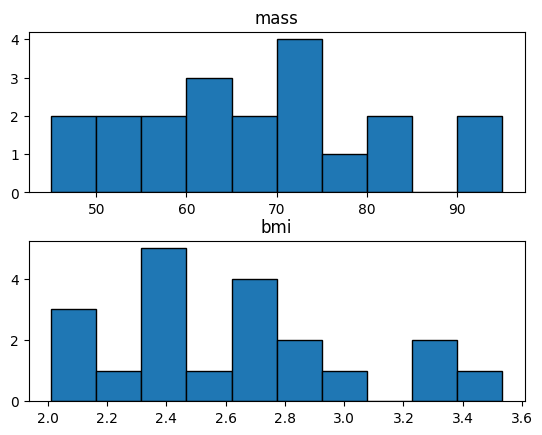

In [6]:
fig, ax = plt.subplots(2)
ax[0].hist(x, edgecolor="black")
ax[1].hist(y, edgecolor="black")
ax[0].set_title(cols[0])
ax[1].set_title(cols[1])
plt.subplots_adjust(hspace=0.3)
plt.show()

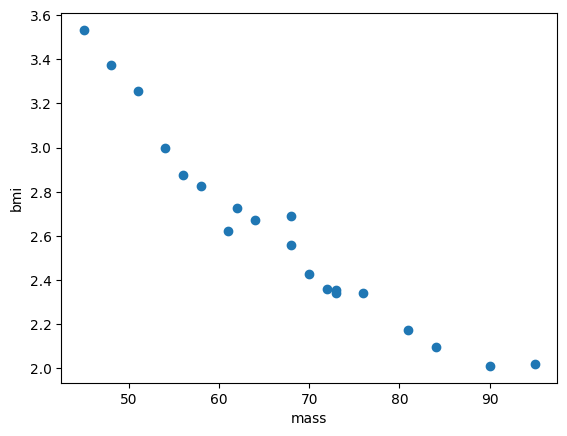

In [7]:
plt.scatter(x, y)
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()

# Регрессия

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
nx = x.reshape(-1, 1)
nx = (nx - nx.mean()) / nx.std()

In [10]:
lin_reg = LinearRegression().fit(nx, y)
sq_reg = LinearRegression().fit(np.concat([nx, nx ** 2], axis=1), y)
hyp_reg = LinearRegression().fit(1 / nx, y)
log_reg = LinearRegression().fit(nx, np.log(y))

In [11]:
def fisher(predict: np.ndarray, target: np.ndarray):
    num = (predict - target).std() ** 2
    den = target.std() ** 2
    return num / den

In [12]:
fisher(lin_reg.predict(nx), y)

np.float64(0.0772294340984141)

In [13]:
fisher(sq_reg.predict(np.concat([nx, nx ** 2], axis=1)), y)

np.float64(0.022069761556853505)

In [14]:
fisher(hyp_reg.predict(1 / nx), y)

np.float64(0.9864233267194386)

In [15]:
fisher(np.exp(log_reg.predict(nx)), y)

np.float64(0.045729293453128636)

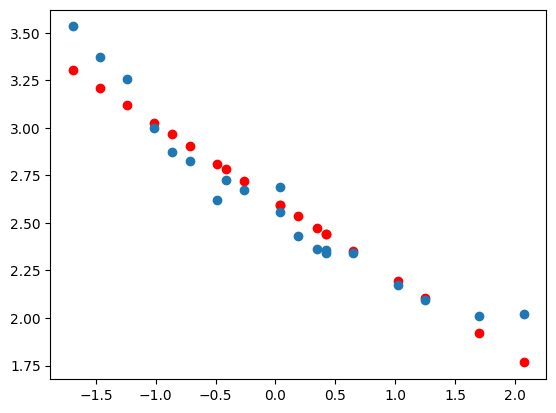

In [18]:
plt.scatter(nx, lin_reg.predict(nx), color="red")
plt.scatter(nx, y)
plt.show()

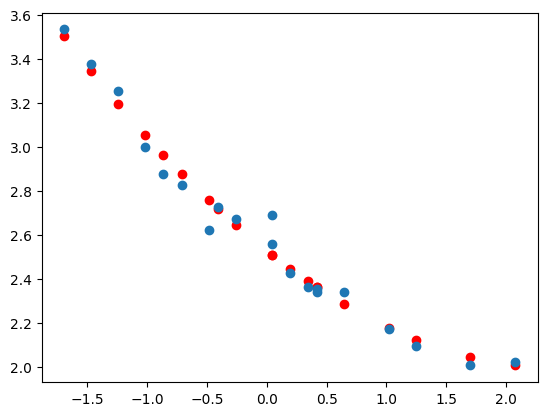

In [19]:
plt.scatter(nx, sq_reg.predict(np.concat([nx, nx ** 2], axis=1)), color="red")
plt.scatter(nx, y)
plt.show()

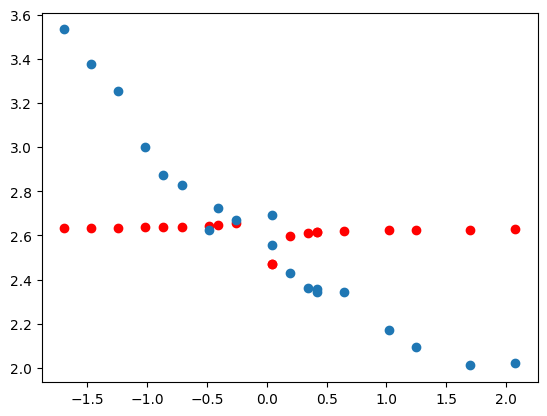

In [20]:
plt.scatter(nx, hyp_reg.predict(1 / nx), color="red")
plt.scatter(nx, y)
plt.show()

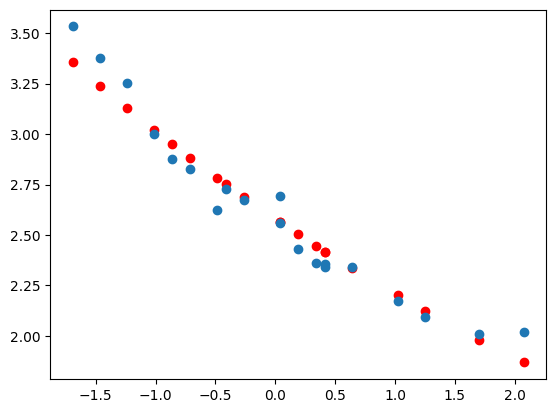

In [21]:
plt.scatter(nx, np.exp(log_reg.predict(nx)), color="red")
plt.scatter(nx, y)
plt.show()